In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.figure import Figure
import matplotlib.animation as animation
import tkinter as tk
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, 
NavigationToolbar2Tk)
        
class Blade:
    '''Creates instance of a fan Blade with a strip of LEDs.'''
    def __init__(self, num=10, spacing=1, freq=60, offset=0):
        self.leds_num = num #Number of LEDs
        self.leds_spacing = spacing #Centimeters
        self.freq = freq #Hertz (spins/sec)
        self.offset = offset #Angle of rotational offset for initialization
        self.cur_img = [] #Loaded Image for LED Display
        
        
        self.x_values = []
        self.y_values = []
        self.matrix = [] #LED layout
        
        self.create_matrix()
    
    class Animation:
        '''Inner Class specifically to animate LEDs in motion for reference.'''
        def __init__(self, x, y, spacing, freq):
            self.x, self.y = x, y
            self.leds_spacing, self.freq = spacing, freq
            self.fig = plt.Figure()
            self.ax = self.fig.add_subplot(111)
            self.line, = self.ax.plot(self.x[0], self.y[0], 'ro') #Representing LEDS as red dots, no color data rn
            
        def update_anim(self, i):
            '''Iterates through frames of the data.'''
            self.line.set_xdata(self.x[i])
            self.line.set_ydata(self.y[i])
            return self.line,
        
        def anim_func(self):
            '''Tkinter GUI.'''
            lim = np.abs(self.x.max())
            xmin, ymin = -1*lim, -1*lim
            xmax, ymax = lim, lim
            
            root = tk.Tk()
            
            label = tk.Label(root,text="Fan Simulation").grid(column=0, row=0)
            
            canvas = FigureCanvasTkAgg(self.fig, master=root)
            canvas.get_tk_widget().grid(column=0,row=1)
            
            self.ax.set_xlim([xmin-self.leds_spacing, xmax+self.leds_spacing])
            self.ax.set_ylim([ymin-self.leds_spacing, ymax+self.leds_spacing])
            ani = animation.FuncAnimation(
                self.fig, self.update_anim,
                self.freq, interval=120, blit=False
            ) #interval is delay between frames, should be changed later
            
            tk.mainloop()
        
    def set_num(self, num):
        '''Sets the number of LEDs on a strip.'''
        if num >= 1:
            self.leds_num = num
        else:
            raise ValueError('Please choose an appropriate integer value greater or equal to 1.')
    
    def set_spacing(self, spacing):
        '''Sets spacing between LEDs on a strip'''
        if spacing > 0:
            self.leds_spacing = spacing
        else:
            raise ValueError('Please choose an appropriate spacing value greater than 0.')
    
    def set_freq(self, freq):
        '''Sets the frequency of rotation for a fan. Positive values are CCW rotation, negative are CW.'''
        self.freq = freq
        
    def create_matrix(self):
        '''Creates a matrix using numpy arrays to assign pixel coordinates
        to the fan based on its defined features.'''
        r_values = []
        for led in range(self.leds_num):
            r_values.append((led+1) * self.leds_spacing)
        r_values = np.array(r_values) #Position of each LED along axis
        
        x_values = []
        y_values = []
        
        matrix = [] #Will be of the form matrix[time_i[led_i]]
        for t_i in range(self.freq): #Each instant when data is updated, time_i
            led_list = []
            x_list = []
            y_list = []
            for r in r_values: #For each LED
                x = r*np.cos((2*np.pi / self.freq) * t_i + self.offset) #Should actually be the fps of video file
                y = r*np.sin((2*np.pi / self.freq) * t_i + self.offset) #Using freq so we can see motion clearly
                
                x_list.append(x)
                y_list.append(y)
                led_list.append(np.array([x,y,[0,0,0]]))
                
            matrix.append(np.array(led_list))
            x_values.append(np.array(x_list))
            y_values.append(np.array(y_list))
        
        self.x_values = np.array(x_values)
        self.y_values = np.array(y_values)
        self.matrix = np.array(matrix)
        
    def set_image(self, file_loc):
        '''Given a square image, finds the nearest pixel positions corresponding to
        the LED matrix, and places the RGB value in the matrix.'''
        if not isinstance(file_loc, str):
            raise TypeError('Please specify a String address')

        self.cur_img = mpimg.imread(file_loc)
        img_size = self.cur_img.shape[0]

        conv_factor = (img_size/2) * (1/self.x_values.max())
        tx, ty = np.ceil(conv_factor*self.x_values)+(img_size/2 - 1), np.ceil(conv_factor*self.y_values)+(img_size/2 - 1)

        t_val = []
        for time in range(len(tx)):
            tmp = []
            for ind in range(len(tx[time])):
                tmp.append(self.cur_img[int(tx[time][ind])][int(ty[time][ind])])
            t_val.append(tmp)

        for t_i,t_e in enumerate(t_val):
            for num_i,num_e in enumerate(t_e):
                self.matrix[t_i][num_i][2] = tuple(num_e/255) #matplotlib uses rgb as float from [0,1], so divide by 255
        
    def get_matrix(self):
        '''Returns matrix.'''
        return self.matrix
    
    def get_xy(self):
        '''Returns x values and y values arrays as (x,y).'''
        return (self.x_values, self.y_values)
    
    def get_image_original(self):
        '''Returns loaded image if available, otherwise 0'''
        return self.cur_img
    
    def get_image_displayed(self):
        '''Plots image to be displayed if available, otherwise 0'''
        if len(self.cur_img) == 0:
            return 0
        else:
            for t in b.get_matrix():
                for led in t:
                    plt.plot(led[0], led[1], color=led[2], marker='o')
    
    def animate(self):
        '''Creates an animation showing current setup of LEDs.'''
        x, y = self.get_xy()
        self.Animation(x, y, self.leds_spacing, self.freq).anim_func()

In [9]:
#Demo Function - Blade Animation
def demo1():
    num = int(input("Number of LEDs? "))
    spacing = float(input("Spacing between LEDs in cm? "))
    freq = int(input("Freq in Hz? "))
    
    b = Blade(num, spacing, freq) #Instantiate a Blade
    b.animate() #Animate Blade

demo1()

Number of LEDs? 15
Spacing between LEDs in cm? 1
Freq in Hz? 60


Enter the following 'clock_128.jpg', 'space_225.jpg', or custom location as string
Image: space_225.jpg


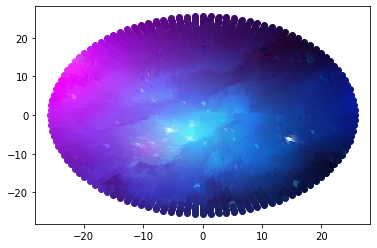

In [5]:
#Demo Function - Image Loading and Display
def demo2():
    b = Blade(64, .4, 120) #Instantiate a Blade with decent LED resolution
    print("Enter the following 'clock_128.jpg', 'space_225.jpg', or custom location as string")
    img_file = input("Image: ")
    
    b.set_image(img_file)
    b.get_image_displayed()

demo2()